In [1]:
#ch 2 datasets
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import display

from scipy import signal
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
#from .make_blobs import make_blobs

#DATA_PATH = os.path.join(os.path.dirname(__file__), "..", "data")


def make_forge():
    # a carefully hand-designed dataset lol
    X, y = make_blobs(centers=2, random_state=4, n_samples=30)
    y[np.array([7, 27])] = 0
    mask = np.ones(len(X), dtype=np.bool)
    mask[np.array([0, 1, 5, 26])] = 0
    X, y = X[mask], y[mask]
    return X, y


def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y


def load_extended_boston():
    boston = load_boston()
    X = boston.data

    X = MinMaxScaler().fit_transform(boston.data)
    X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
    return X, boston.target


def load_citibike():
    data_mine = pd.read_csv(os.path.join(DATA_PATH, "citibike.csv"))
    data_mine['one'] = 1
    data_mine['starttime'] = pd.to_datetime(data_mine.starttime)
    data_starttime = data_mine.set_index("starttime")
    data_resampled = data_starttime.resample("3h").sum().fillna(0)
    return data_resampled.one


def make_signals():
    # fix a random state seed
    rng = np.random.RandomState(42)
    n_samples = 2000
    time = np.linspace(0, 8, n_samples)
    # create three signals
    s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
    s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
    s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

    # concatenate the signals, add noise
    S = np.c_[s1, s2, s3]
    S += 0.2 * rng.normal(size=S.shape)

    S /= S.std(axis=0)  # Standardize data
    S -= S.min()
    return S

In [2]:
#ch 2
#make_blobs
import numbers
import numpy as np

from sklearn.utils import check_array, check_random_state
from sklearn.utils import shuffle as shuffle_
from sklearn.utils.deprecation import deprecated


@deprecated("Please import make_blobs directly from scikit-learn")
def make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.0,
               center_box=(-10.0, 10.0), shuffle=True, random_state=None):
    """Generate isotropic Gaussian blobs for clustering.
    Read more in the :ref:`User Guide <sample_generators>`.
    Parameters
    ----------
    n_samples : int, or tuple, optional (default=100)
        The total number of points equally divided among clusters.
    n_features : int, optional (default=2)
        The number of features for each sample.
    centers : int or array of shape [n_centers, n_features], optional
        (default=3)
        The number of centers to generate, or the fixed center locations.
    cluster_std: float or sequence of floats, optional (default=1.0)
        The standard deviation of the clusters.
    center_box: pair of floats (min, max), optional (default=(-10.0, 10.0))
        The bounding box for each cluster center when centers are
        generated at random.
    shuffle : boolean, optional (default=True)
        Shuffle the samples.
    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.
    Returns
    -------
    X : array of shape [n_samples, n_features]
        The generated samples.
    y : array of shape [n_samples]
        The integer labels for cluster membership of each sample.
    Examples
    --------
    >>> from sklearn.datasets.samples_generator import make_blobs
    >>> X, y = make_blobs(n_samples=10, centers=3, n_features=2,
    ...                   random_state=0)
    >>> print(X.shape)
    (10, 2)
    >>> y
    array([0, 0, 1, 0, 2, 2, 2, 1, 1, 0])
    See also
    --------
    make_classification: a more intricate variant
    """
    generator = check_random_state(random_state)

    if isinstance(centers, numbers.Integral):
        centers = generator.uniform(center_box[0], center_box[1],
                                    size=(centers, n_features))
    else:
        centers = check_array(centers)
        n_features = centers.shape[1]

    if isinstance(cluster_std, numbers.Real):
        cluster_std = np.ones(len(centers)) * cluster_std

    X = []
    y = []

    n_centers = centers.shape[0]
    if isinstance(n_samples, numbers.Integral):
        n_samples_per_center = [int(n_samples // n_centers)] * n_centers
        for i in range(n_samples % n_centers):
            n_samples_per_center[i] += 1
    else:
        n_samples_per_center = n_samples

    for i, (n, std) in enumerate(zip(n_samples_per_center, cluster_std)):
        X.append(centers[i] + generator.normal(scale=std,
                                               size=(n, n_features)))
        y += [i] * n

    X = np.concatenate(X)
    y = np.array(y)

    if shuffle:
        X, y = shuffle_(X, y, random_state=generator)

    return X, y


In [3]:
#ch 2_plot_helpers.py
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap


cm_cycle = ListedColormap(['#0000aa', '#ff5050', '#50ff50', '#9040a0', '#fff000'])
cm3 = ListedColormap(['#0000aa', '#ff2020', '#50ff50'])
cm2 = ListedColormap(['#0000aa', '#ff2020'])

# create a smooth transition from the first to to the second color of cm3
# similar to RdBu but with our red and blue, also not going through white,
# which is really bad for greyscale

cdict = {'red': [(0.0, 0.0, cm2(0)[0]),
                 (1.0, cm2(1)[0], 1.0)],

         'green': [(0.0, 0.0, cm2(0)[1]),
                   (1.0, cm2(1)[1], 1.0)],

         'blue': [(0.0, 0.0, cm2(0)[2]),
                  (1.0, cm2(1)[2], 1.0)]}

ReBl = LinearSegmentedColormap("ReBl", cdict)


def discrete_scatter(x1, x2, y=None, markers=None, s=10, ax=None,
                     labels=None, padding=.2, alpha=1, c=None, markeredgewidth=None):
    """Adaption of matplotlib.pyplot.scatter to plot classes or clusters.
    Parameters
    ----------
    x1 : nd-array
        input data, first axis
    x2 : nd-array
        input data, second axis
    y : nd-array
        input data, discrete labels
    cmap : colormap
        Colormap to use.
    markers : list of string
        List of markers to use, or None (which defaults to 'o').
    s : int or float
        Size of the marker
    padding : float
        Fraction of the dataset range to use for padding the axes.
    alpha : float
        Alpha value for all points.
    """
    if ax is None:
        ax = plt.gca()

    if y is None:
        y = np.zeros(len(x1))

    unique_y = np.unique(y)

    if markers is None:
        markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 10

    if len(markers) == 1:
        markers = markers * len(unique_y)

    if labels is None:
        labels = unique_y

    # lines in the matplotlib sense, not actual lines
    lines = []

    current_cycler = mpl.rcParams['axes.prop_cycle']

    for i, (yy, cycle) in enumerate(zip(unique_y, current_cycler())):
        mask = y == yy
        # if c is none, use color cycle
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color = c
        # use light edge for dark markers
        if np.mean(colorConverter.to_rgb(color)) < .4:
            markeredgecolor = "grey"
        else:
            markeredgecolor = "black"

        lines.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s,
                             label=labels[i], alpha=alpha, c=color,
                             markeredgewidth=markeredgewidth,
                             markeredgecolor=markeredgecolor)[0])

    if padding != 0:
        pad1 = x1.std() * padding
        pad2 = x2.std() * padding
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
        ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))

    return lines


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape:(26, 2)


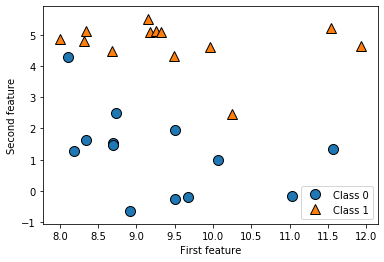

In [4]:
# generate dataset
%matplotlib inline
import matplotlib.pyplot as plt
X, y = make_forge()
#plot dataset
discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:{}".format(X.shape))


Text(0, 0.5, 'Target')

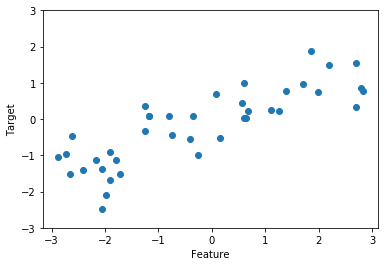

In [5]:
X, y = make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


In [7]:
X, y = load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


In [8]:
# k-neighbors classification
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

#from .datasets import make_forge
#from .plot_helpers import discrete_scatter


def plot_knn_classification(n_neighbors=1):
    X, y = make_forge()

    X_test = np.array([[8.2, 3.66214339], [9.9, 3.2], [11.2, .5]])
    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    for x, neighbors in zip(X_test, closest.T):
        for neighbor in neighbors[:n_neighbors]:
            plt.arrow(x[0], x[1], X[neighbor, 0] - x[0],
                      X[neighbor, 1] - x[1], head_width=0, fc='k', ec='k')

    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    test_points = discrete_scatter(X_test[:, 0], X_test[:, 1], clf.predict(X_test), markers="*")
    training_points = discrete_scatter(X[:, 0], X[:, 1], y)
    plt.legend(training_points + test_points, ["training class 0", "training class 1",
                                               "test pred 0", "test pred 1"])


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


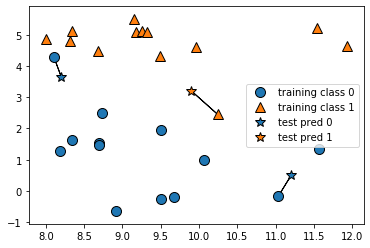

In [9]:
plot_knn_classification(n_neighbors=1)

In [10]:
# k-neighbors classification.Note:neighbors=3
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

#from .datasets import make_forge
#from .plot_helpers import discrete_scatter


def plot_knn_classification(n_neighbors=3):
    X, y = make_forge()

    X_test = np.array([[8.2, 3.66214339], [9.9, 3.2], [11.2, .5]])
    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    for x, neighbors in zip(X_test, closest.T):
        for neighbor in neighbors[:n_neighbors]:
            plt.arrow(x[0], x[1], X[neighbor, 0] - x[0],
                      X[neighbor, 1] - x[1], head_width=0, fc='k', ec='k')

    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    test_points = discrete_scatter(X_test[:, 0], X_test[:, 1], clf.predict(X_test), markers="*")
    training_points = discrete_scatter(X[:, 0], X[:, 1], y)
    plt.legend(training_points + test_points, ["training class 0", "training class 1",
                                               "test pred 0", "test pred 1"])


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


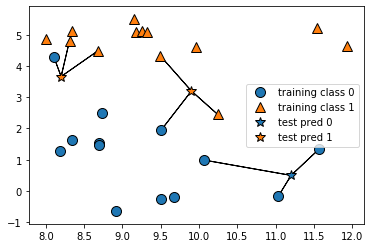

In [11]:
plot_knn_classification(n_neighbors=3)

In [12]:
from sklearn.model_selection import train_test_split
X, y = make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [16]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


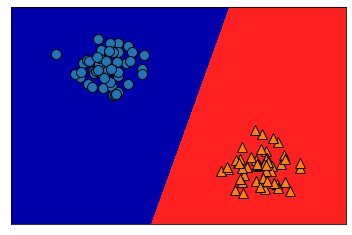

In [17]:
# plot_2d-sepearator.py
import numpy as np
import matplotlib.pyplot as plt
#from .plot_helpers import cm2, cm3, discrete_scatter


def plot_2d_classification(classifier, X, fill=False, ax=None, eps=None,
                           alpha=1, cm=cm3):
    # multiclass
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    decision_values = classifier.predict(X_grid)
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,
                                                         y_min, y_max),
              aspect='auto', origin='lower', alpha=alpha, cmap=cm)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


def plot_2d_scores(classifier, X, ax=None, eps=None, alpha=1, cm="viridis",
                   function=None):
    # binary with fill
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    if function is None:
        function = getattr(classifier, "decision_function",
                           getattr(classifier, "predict_proba"))
    else:
        function = getattr(classifier, function)
    decision_values = function(X_grid)
    if decision_values.ndim > 1 and decision_values.shape[1] > 1:
        # predict_proba
        decision_values = decision_values[:, 1]
    grr = ax.imshow(decision_values.reshape(X1.shape),
                    extent=(x_min, x_max, y_min, y_max), aspect='auto',
                    origin='lower', alpha=alpha, cmap=cm)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    return grr


def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None, alpha=1,
                      cm=cm2, linewidth=None, threshold=None,
                      linestyle="solid"):
    # binary?
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0] if threshold is None else [threshold]
        fill_levels = [decision_values.min()] + levels + [
            decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5] if threshold is None else [threshold]
        fill_levels = [0] + levels + [1]
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, alpha=alpha, cmap=cm)
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black", alpha=alpha, linewidths=linewidth,
                   linestyles=linestyle, zorder=5)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


if __name__ == '__main__':
    from sklearn.datasets import make_blobs
    from sklearn.linear_model import LogisticRegression
    X, y = make_blobs(centers=2, random_state=42)
    clf = LogisticRegression().fit(X, y)
    plot_2d_separator(clf, X, fill=True)
    discrete_scatter(X[:, 0], X[:, 1], y)

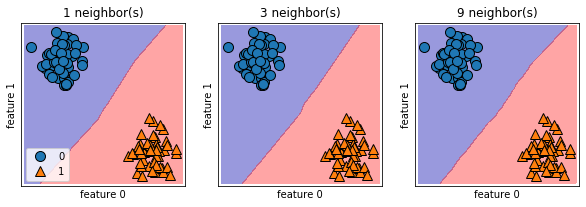

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

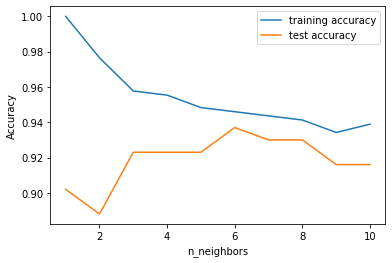

In [19]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [20]:
# plot knn_regression.py
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import euclidean_distances

#from .datasets import make_wave
#from .plot_helpers import cm3


def plot_knn_regression(n_neighbors=1):
    X, y = make_wave(n_samples=40)
    X_test = np.array([[-1.5], [0.9], [1.5]])

    dist = euclidean_distances(X, X_test)
    closest = np.argsort(dist, axis=0)

    plt.figure(figsize=(10, 6))

    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X, y)
    y_pred = reg.predict(X_test)

    for x, y_, neighbors in zip(X_test, y_pred, closest.T):
        for neighbor in neighbors[:n_neighbors]:
                plt.arrow(x[0], y_, X[neighbor, 0] - x[0], y[neighbor] - y_,
                          head_width=0, fc='k', ec='k')

    train, = plt.plot(X, y, 'o', c=cm3(0))
    test, = plt.plot(X_test, -3 * np.ones(len(X_test)), '*', c=cm3(2),
                     markersize=20)
    pred, = plt.plot(X_test, y_pred, '*', c=cm3(0), markersize=20)
    plt.vlines(X_test, -3.1, 3.1, linestyle="--")
    plt.legend([train, test, pred],
               ["training data/target", "test data", "test prediction"],
               ncol=3, loc=(.1, 1.025))
    plt.ylim(-3.1, 3.1)
    plt.xlabel("Feature")
    plt.ylabel("Target")

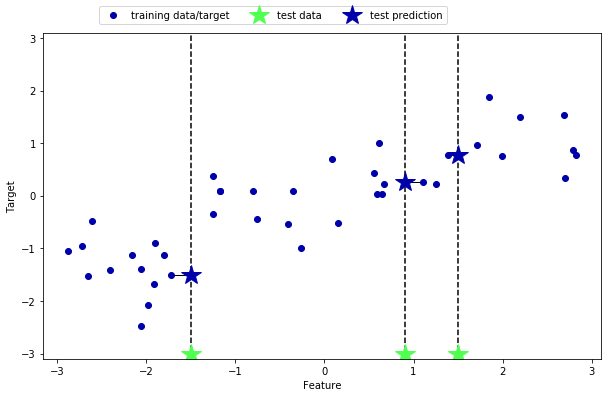

In [21]:
plot_knn_regression(n_neighbors=1)

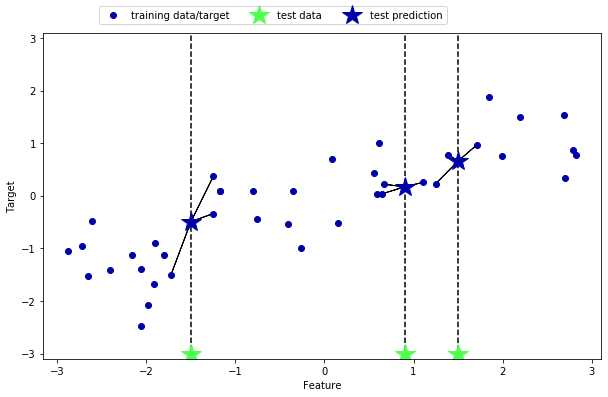

In [22]:
plot_knn_regression(n_neighbors=3)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X, y = make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [24]:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [25]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


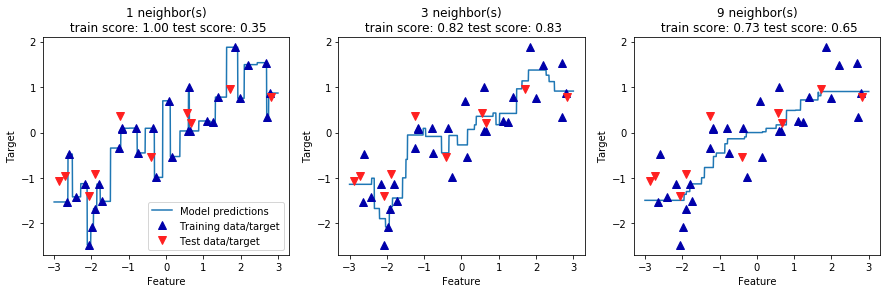

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from .datasets import make_wave
#from .plot_helpers import cm2


def plot_linear_regression_wave():
    X, y = make_wave(n_samples=60)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

    line = np.linspace(-3, 3, 100).reshape(-1, 1)

    lr = LinearRegression().fit(X_train, y_train)
    print("w[0]: %f  b: %f" % (lr.coef_[0], lr.intercept_))

    plt.figure(figsize=(8, 8))
    plt.plot(line, lr.predict(line))
    plt.plot(X, y, 'o', c=cm2(0))
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.set_ylim(-3, 3)
    #ax.set_xlabel("Feature")
    #ax.set_ylabel("Target")
    ax.legend(["model", "training data"], loc="best")
    ax.grid(True)
    ax.set_aspect('equal')


w[0]: 0.393906  b: -0.031804


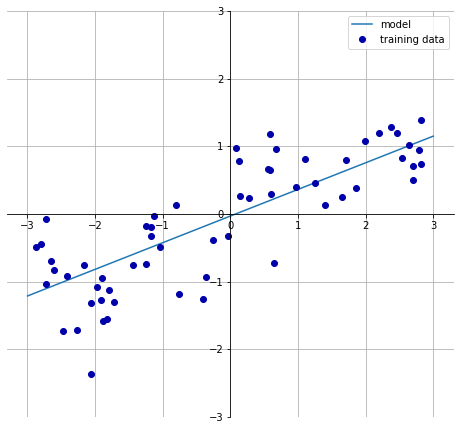

In [28]:
plot_linear_regression_wave()

In [29]:
from sklearn.linear_model import LinearRegression
X, y = make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [30]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.03180434302675976


In [31]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [32]:
X, y = load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [33]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 0.95
Test set score: 0.61


In [34]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [35]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [36]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


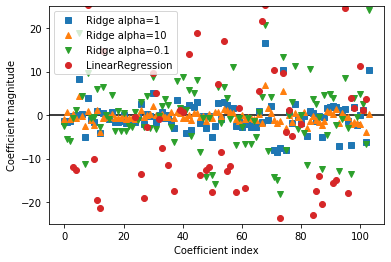

In [37]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

In [38]:
# plot ridge.py
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import learning_curve, KFold

#from .datasets import load_extended_boston


def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(
        est, X, y, train_sizes=np.linspace(.1, 1, 20), cv=KFold(20, shuffle=True, random_state=1))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--',
                    label="training " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-',
             label="test " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score (R^2)')
    plt.ylim(0, 1.1)


def plot_ridge_n_samples():
    X, y = load_extended_boston()

    plot_learning_curve(Ridge(alpha=1), X, y)
    plot_learning_curve(LinearRegression(), X, y)
    plt.legend(loc=(0, 1.05), ncol=2, fontsize=11)

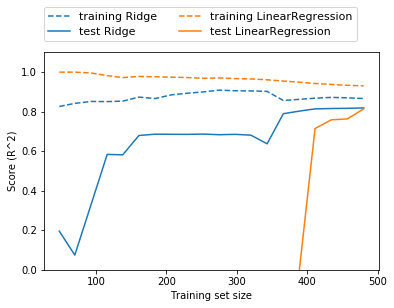

In [39]:
plot_ridge_n_samples()

In [40]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [41]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [42]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


Text(0, 0.5, 'Coefficient magnitude')

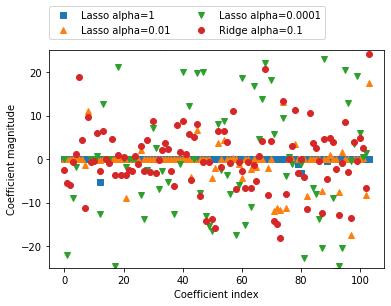

In [43]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

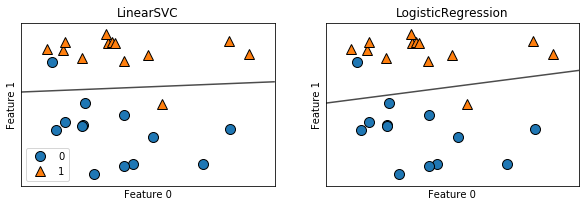

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()


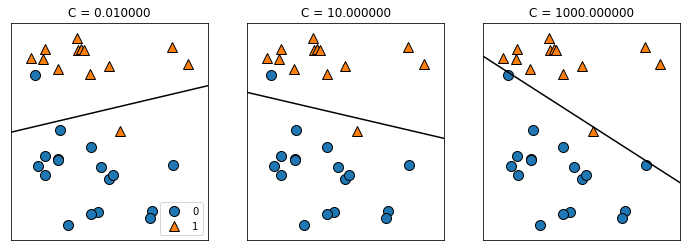

In [45]:
# plot_linear_svc_regularization.py
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs

#from .plot_helpers import discrete_scatter

def plot_linear_svc_regularization():
    X, y = make_blobs(centers=2, random_state=4, n_samples=30)
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    # a carefully hand-designed dataset lol
    y[7] = 0
    y[27] = 0
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    for ax, C in zip(axes, [1e-2, 10, 1e3]):
        discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

        svm = LinearSVC(C=C, tol=0.00001, dual=False).fit(X, y)
        w = svm.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(6, 13)
        yy = a * xx - (svm.intercept_[0]) / w[1]
        ax.plot(xx, yy, c='k')
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title("C = %f" % C)
    axes[0].legend(loc="best")

if __name__ == "__main__":
    plot_linear_svc_regularization()
    plt.show()

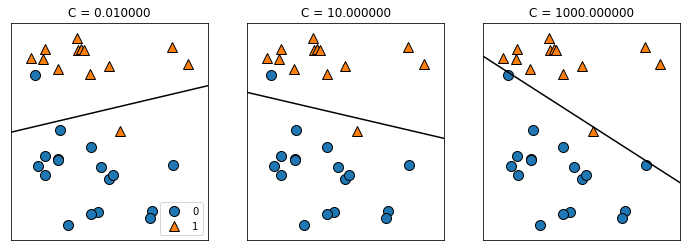

In [46]:
plot_linear_svc_regularization()

In [47]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


In [48]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.967
Test set score: 0.965


In [49]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


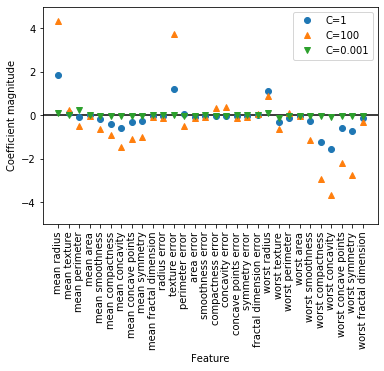

In [50]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


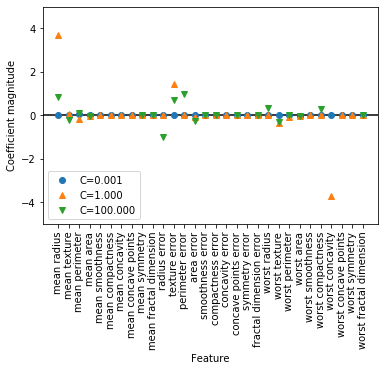

In [51]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

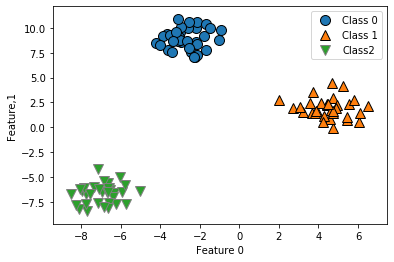

In [52]:
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=42)
discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('Feature 0')
plt.ylabel('Feature,1')
plt.legend(['Class 0', 'Class 1','Class2'])


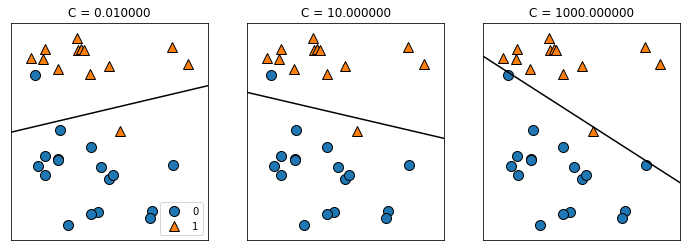

In [53]:
#plot_linear_svc-regularization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs

#from .plot_helpers import discrete_scatter


def plot_linear_svc_regularization():
    X, y = make_blobs(centers=2, random_state=4, n_samples=30)
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    # a carefully hand-designed dataset lol
    y[7] = 0
    y[27] = 0
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    for ax, C in zip(axes, [1e-2, 10, 1e3]):
        discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

        svm = LinearSVC(C=C, tol=0.00001, dual=False).fit(X, y)
        w = svm.coef_[0]
        a = -w[0] / w[1]
        xx = np.linspace(6, 13)
        yy = a * xx - (svm.intercept_[0]) / w[1]
        ax.plot(xx, yy, c='k')
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title("C = %f" % C)
    axes[0].legend(loc="best")

if __name__ == "__main__":
    plot_linear_svc_regularization()
    plt.show()


In [54]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


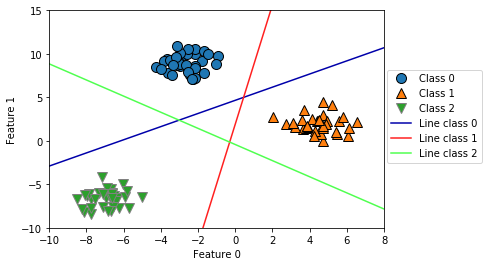

In [55]:
discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

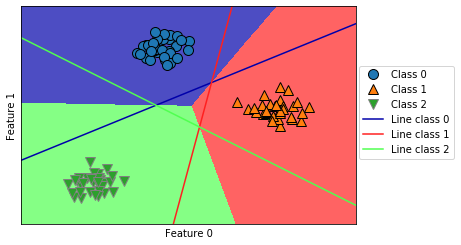

In [56]:
plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [57]:
# instantiate model and fit it in one line
logreg = LogisticRegression().fit(X_train, y_train)

In [58]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

In [59]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

In [60]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [61]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n", counts)

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [62]:
from scipy.misc import imread
import matplotlib.pyplot as plt

def plot_animal_tree(ax=None):
    import graphviz
    if ax is None:
        ax = plt.gca()
    mygraph = graphviz.Digraph(node_attr={'shape': 'box'},
                               edge_attr={'labeldistance': "10.5"},
                               format="png")
    mygraph.node("0", "Has feathers?")
    mygraph.node("1", "Can fly?")
    mygraph.node("2", "Has fins?")
    mygraph.node("3", "Hawk")
    mygraph.node("4", "Penguin")
    mygraph.node("5", "Dolphin")
    mygraph.node("6", "Bear")
    mygraph.edge("0", "1", label="True")
    mygraph.edge("0", "2", label="False")
    mygraph.edge("1", "3", label="True")
    mygraph.edge("1", "4", label="False")
    mygraph.edge("2", "5", label="True")
    mygraph.edge("2", "6", label="False")
    mygraph.render("tmp")
    ax.imshow(imread("tmp.png"))
    ax.set_axis_off()

plot_animal_tree


<function __main__.plot_animal_tree(ax=None)>

In [63]:
#plot_interactive_tree
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

from sklearn.externals.six import StringIO  # doctest: +SKIP
from sklearn.tree import export_graphviz
from scipy.misc import imread
from scipy import ndimage
from sklearn.datasets import make_moons

import re

#from .tools import discrete_scatter
#from .plot_helpers import cm2


def tree_image(tree, fout=None):
    try:
        import graphviz
    except ImportError:
        # make a hacky white plot
        x = np.ones((10, 10))
        x[0, 0] = 0
        return x
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, max_depth=3, impurity=False)
    data = dot_data.getvalue()
    #data = re.sub(r"gini = 0\.[0-9]+\\n", "", dot_data.getvalue())
    data = re.sub(r"samples = [0-9]+\\n", "", data)
    data = re.sub(r"\\nsamples = [0-9]+", "", data)
    data = re.sub(r"value", "counts", data)

    graph = graphviz.Source(data, format="png")
    if fout is None:
        fout = "tmp"
    graph.render(fout)
    return imread(fout + ".png")


def plot_tree_progressive():
    X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
    plt.figure()
    ax = plt.gca()
    discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_xticks(())
    ax.set_yticks(())

    axes = []
    for i in range(3):
        fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                               subplot_kw={'xticks': (), 'yticks': ()})
        axes.append(ax)
    axes = np.array(axes)

    for i, max_depth in enumerate([1, 2, 9]):
        tree = plot_tree(X, y, max_depth=max_depth, ax=axes[i, 0])
        axes[i, 1].imshow(tree_image(tree))
        axes[i, 1].set_axis_off()


def plot_tree_partition(X, y, tree, ax=None):
    if ax is None:
        ax = plt.gca()
    eps = X.std() / 2.

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]

    Z = tree.predict(X_grid)
    Z = Z.reshape(X1.shape)
    faces = tree.apply(X_grid)
    faces = faces.reshape(X1.shape)
    border = ndimage.laplace(faces) != 0
    ax.contourf(X1, X2, Z, alpha=.4, cmap=cm2, levels=[0, .5, 1])
    ax.scatter(X1[border], X2[border], marker='.', s=1)

    discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    return ax


def plot_tree(X, y, max_depth=1, ax=None):
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0).fit(X, y)
    ax = plot_tree_partition(X, y, tree, ax=ax)
    ax.set_title("depth = %d" % max_depth)
    return tree


In [64]:
plot_animal_tree

<function __main__.plot_animal_tree(ax=None)>

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


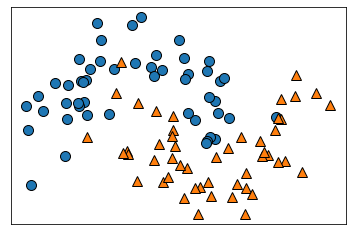

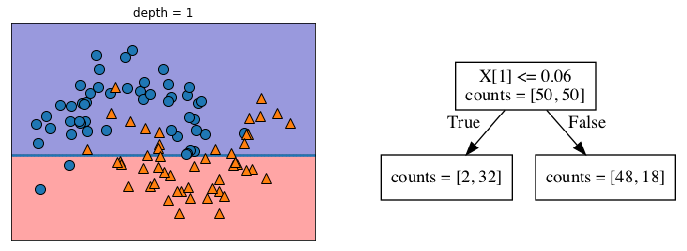

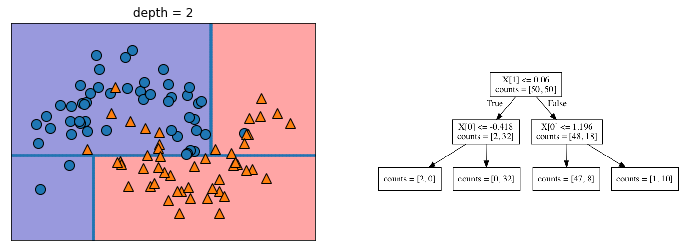

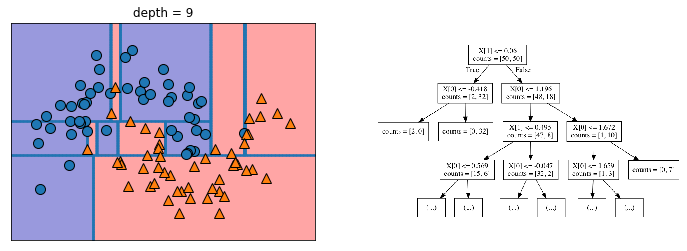

In [65]:
plot_tree_progressive()

In [66]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [67]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [68]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

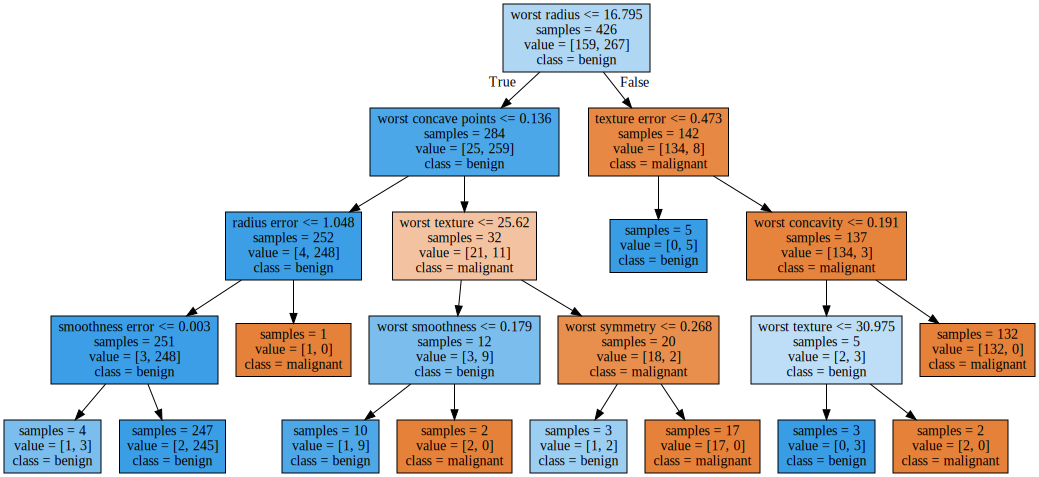

In [69]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [70]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


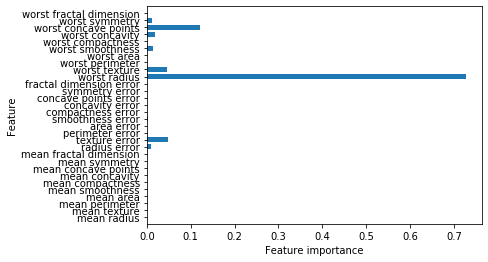

In [71]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

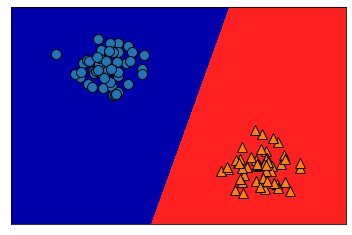

In [72]:
#Ch2 Plot_2D_Seperator.py
import numpy as np
import matplotlib.pyplot as plt
#from .plot_helpers import cm2, cm3, discrete_scatter


def plot_2d_classification(classifier, X, fill=False, ax=None, eps=None,
                           alpha=1, cm=cm3):
    # multiclass
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    decision_values = classifier.predict(X_grid)
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,
                                                         y_min, y_max),
              aspect='auto', origin='lower', alpha=alpha, cmap=cm)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


def plot_2d_scores(classifier, X, ax=None, eps=None, alpha=1, cm="viridis",
                   function=None):
    # binary with fill
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    if function is None:
        function = getattr(classifier, "decision_function",
                           getattr(classifier, "predict_proba"))
    else:
        function = getattr(classifier, function)
    decision_values = function(X_grid)
    if decision_values.ndim > 1 and decision_values.shape[1] > 1:
        # predict_proba
        decision_values = decision_values[:, 1]
    grr = ax.imshow(decision_values.reshape(X1.shape),
                    extent=(x_min, x_max, y_min, y_max), aspect='auto',
                    origin='lower', alpha=alpha, cmap=cm)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    return grr


def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None, alpha=1,
                      cm=cm2, linewidth=None, threshold=None,
                      linestyle="solid"):
    # binary?
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0] if threshold is None else [threshold]
        fill_levels = [decision_values.min()] + levels + [
            decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5] if threshold is None else [threshold]
        fill_levels = [0] + levels + [1]
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, alpha=alpha, cmap=cm)
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black", alpha=alpha, linewidths=linewidth,
                   linestyles=linestyle, zorder=5)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


if __name__ == '__main__':
    from sklearn.datasets import make_blobs
    from sklearn.linear_model import LogisticRegression
    X, y = make_blobs(centers=2, random_state=42)
    clf = LogisticRegression().fit(X, y)
    plot_2d_separator(clf, X, fill=True)
    discrete_scatter(X[:, 0], X[:, 1], y)
    plt.show()

In [73]:
#Ch2 _tools.py
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
#from .plot_2d_separator import (plot_2d_separator, plot_2d_classification,
                                 #plot_2d_scores)
#from .plot_helpers import cm2 as cm, discrete_scatter


def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    """Visualize coefficients of a linear model.
    Parameters
    ----------
    coefficients : nd-array, shape (n_features,)
        Model coefficients.
    feature_names : list or nd-array of strings, shape (n_features,)
        Feature names for labeling the coefficients.
    n_top_features : int, default=25
        How many features to show. The function will show the largest (most
        positive) and smallest (most negative)  n_top_features coefficients,
        for a total of 2 * n_top_features coefficients.
    """
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = [cm(1) if c < 0 else cm(0)
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")


def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img


def make_handcrafted_dataset():
    # a carefully hand-designed dataset lol
    X, y = make_blobs(centers=2, random_state=4, n_samples=30)
    y[np.array([7, 27])] = 0
    mask = np.ones(len(X), dtype=np.bool)
    mask[np.array([0, 1, 5, 26])] = 0
    X, y = X[mask], y[mask]
    return X, y


def print_topics(topics, feature_names, sorting, topics_per_chunk=6,
                 n_words=20):
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")


def get_tree(tree, **kwargs):
    try:
        # python3
        from io import StringIO
    except ImportError:
        # python2
        from StringIO import StringIO
    f = StringIO()
    export_graphviz(tree, f, **kwargs)
    import graphviz
    return graphviz.Source(f.getvalue())

__all__ = ['plot_2d_separator', 'plot_2d_classification', 'plot_2d_scores',
           'cm', 'visualize_coefficients', 'print_topics', 'heatmap',
           'discrete_scatter']

In [74]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#from .tools import discrete_scatter
#from .plot_2d_separator import plot_2d_separator


def plot_tree_not_monotone():
    import graphviz
    # make a simple 2d dataset
    X, y = make_blobs(centers=4, random_state=8)
    y = y % 2
    plt.figure()
    discrete_scatter(X[:, 0], X[:, 1], y)
    plt.legend(["Class 0", "Class 1"], loc="best")

    # learn a decision tree model
    tree = DecisionTreeClassifier(random_state=0).fit(X, y)
    plot_2d_separator(tree, X, linestyle="dashed")

    # visualize the tree
    export_graphviz(tree, out_file="mytree.dot", impurity=False, filled=True)
    with open("mytree.dot") as f:
        dot_graph = f.read()
    print("Feature importances: %s" % tree.feature_importances_)
    return graphviz.Source(dot_graph)

Feature importances: [0. 1.]


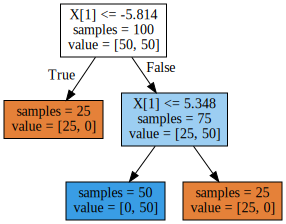

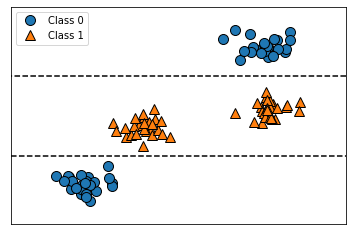

In [75]:
tree = plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

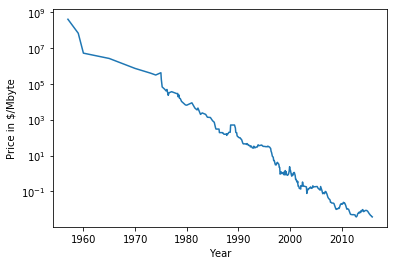

In [76]:
#Ch2 - see data ram_price.csv
import os
import pandas as pd
import matplotlib.pyplot as plt
ram_prices = pd.read_csv('ram_price.csv')

plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel('Year')
plt.ylabel('Price in $/Mbyte')


In [77]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

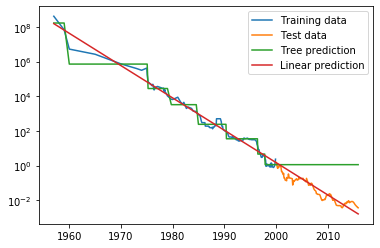

In [78]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

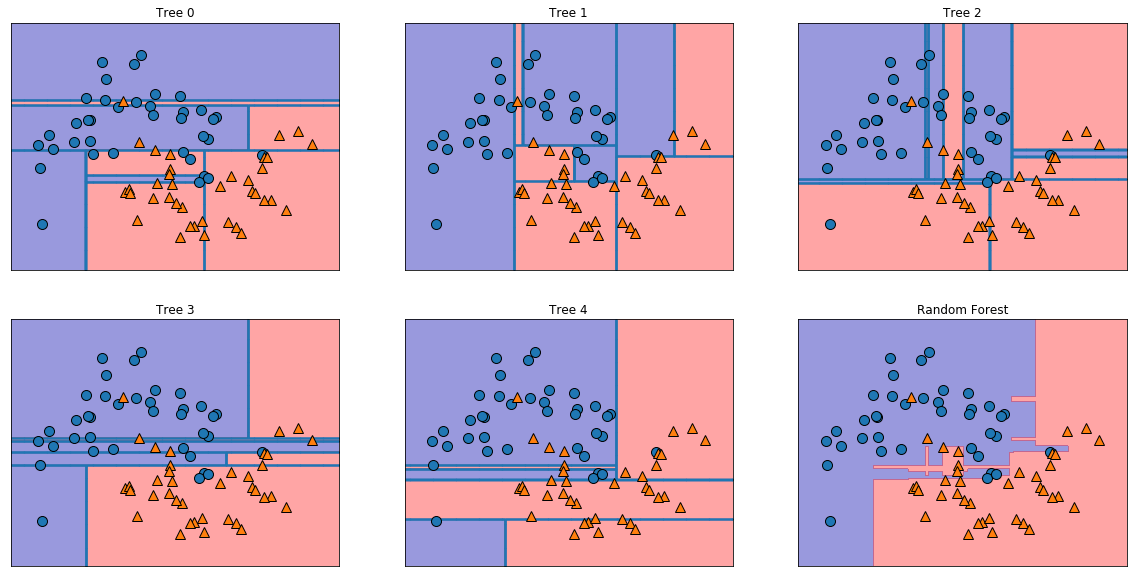

In [80]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    plot_tree_partition(X_train, y_train, tree, ax=ax)
    
plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)



In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


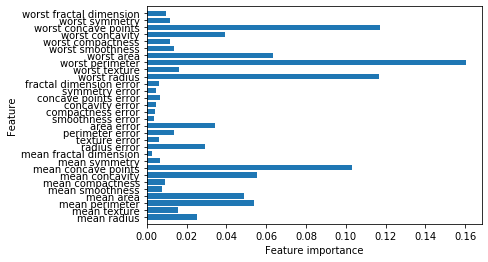

In [82]:
plot_feature_importances_cancer(forest)

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


In [84]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [85]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.965


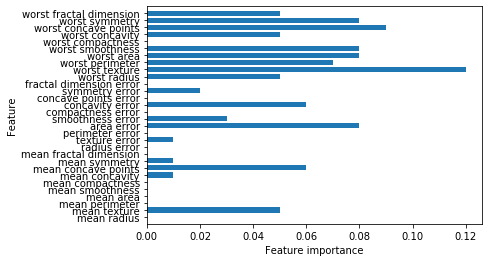

In [86]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

Text(0, 0.5, 'Feature 1')

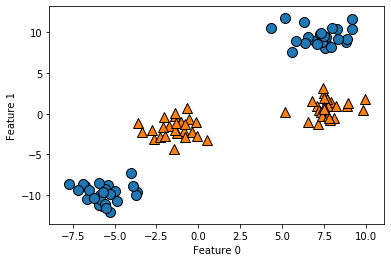

In [87]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

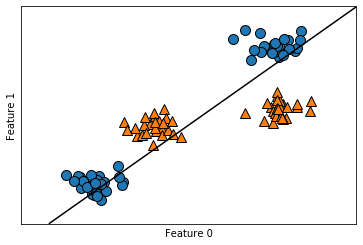

In [88]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

plot_2d_separator(linear_svm, X)
discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [89]:
#ch2-tools.py
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
#from .plot_2d_separator import (plot_2d_separator, plot_2d_classification,
                                #plot_2d_scores)
#from .plot_helpers import cm2 as cm, discrete_scatter


def visualize_coefficients(coefficients, feature_names, n_top_features=25):
    """Visualize coefficients of a linear model.
    Parameters
    ----------
    coefficients : nd-array, shape (n_features,)
        Model coefficients.
    feature_names : list or nd-array of strings, shape (n_features,)
        Feature names for labeling the coefficients.
    n_top_features : int, default=25
        How many features to show. The function will show the largest (most
        positive) and smallest (most negative)  n_top_features coefficients,
        for a total of 2 * n_top_features coefficients.
    """
    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        # this is not a row or column vector
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    # get coefficients with large absolute values
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    # plot them
    plt.figure(figsize=(15, 5))
    colors = [cm(1) if c < 0 else cm(0)
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")


def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img


def make_handcrafted_dataset():
    # a carefully hand-designed dataset lol
    X, y = make_blobs(centers=2, random_state=4, n_samples=30)
    y[np.array([7, 27])] = 0
    mask = np.ones(len(X), dtype=np.bool)
    mask[np.array([0, 1, 5, 26])] = 0
    X, y = X[mask], y[mask]
    return X, y


def print_topics(topics, feature_names, sorting, topics_per_chunk=6,
                 n_words=20):
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")


def get_tree(tree, **kwargs):
    try:
        # python3
        from io import StringIO
    except ImportError:
        # python2
        from StringIO import StringIO
    f = StringIO()
    export_graphviz(tree, f, **kwargs)
    import graphviz
    return graphviz.Source(f.getvalue())

__all__ = ['plot_2d_separator', 'plot_2d_classification', 'plot_2d_scores',
           'cm', 'visualize_coefficients', 'print_topics', 'heatmap',
           'discrete_scatter']

Text(0.5, 0, 'feature1 ** 2')

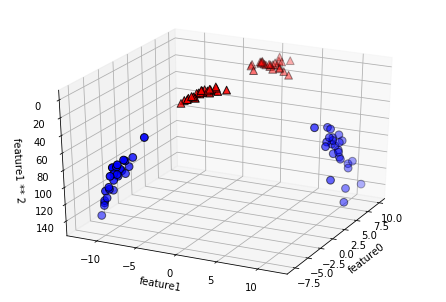

In [90]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=cm2,s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0.5, 0, 'feature1 ** 2')

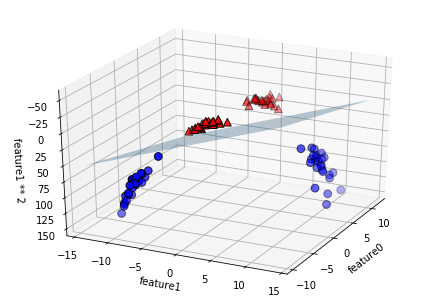

In [91]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0, 0.5, 'Feature 1')

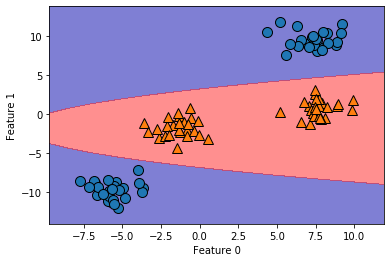

In [92]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=cm2, alpha=0.5)
discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

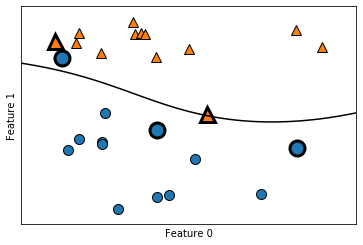

In [93]:
from sklearn.svm import SVC

X, y = make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
plot_2d_separator(svm, X, eps=.5)
discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [94]:
# Ch2-plot_rbf_svm_parameters.py
import matplotlib.pyplot as plt
from sklearn.svm import SVC
#from .plot_2d_separator import plot_2d_separator
#from .tools import make_handcrafted_dataset
#from .plot_helpers import discrete_scatter


def plot_svm(log_C, log_gamma, ax=None):
    X, y = make_handcrafted_dataset()
    C = 10. ** log_C
    gamma = 10. ** log_gamma
    svm = SVC(kernel='rbf', C=C, gamma=gamma).fit(X, y)
    if ax is None:
        ax = plt.gca()
    plot_2d_separator(svm, X, ax=ax, eps=.5)
    # plot data
    discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    # plot support vectors
    sv = svm.support_vectors_
    # class labels of support vectors are given by the sign of the dual coefficients
    sv_labels = svm.dual_coef_.ravel() > 0
    discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3, ax=ax)
    ax.set_title("C = %.4f gamma = %.4f" % (C, gamma))


def plot_svm_interactive():
    from IPython.html.widgets import interactive, FloatSlider
    C_slider = FloatSlider(min=-3, max=3, step=.1, value=0, readout=False)
    gamma_slider = FloatSlider(min=-2, max=2, step=.1, value=0, readout=False)


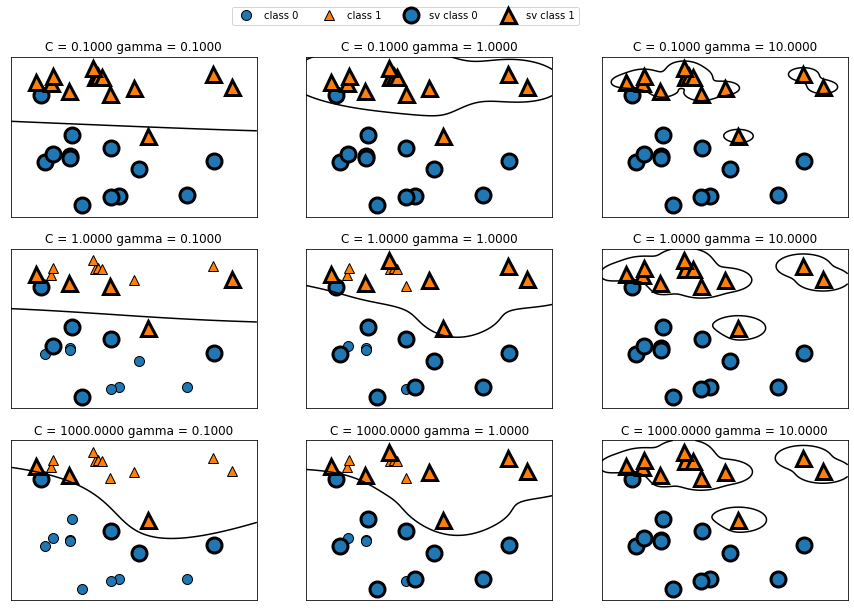

In [95]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


Text(0, 0.5, 'Feature magnitude')

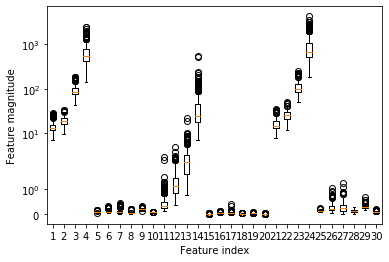

In [97]:
plt.boxplot(X_train)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

In [98]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

Minimum for each feature
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [99]:
# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training

In [100]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


In [101]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


In [102]:
#Ch2 - plot_nn_graphs.py
def plot_logistic_regression_graph():
    import graphviz
    lr_graph = graphviz.Digraph(node_attr={'shape': 'circle', 'fixedsize': 'True'},
                                graph_attr={'rankdir': 'LR', 'splines': 'line'})
    inputs = graphviz.Digraph(node_attr={'shape': 'circle'}, name="cluster_0")
    output = graphviz.Digraph(node_attr={'shape': 'circle'}, name="cluster_2")

    for i in range(4):
        inputs.node("x[%d]" % i, labelloc="c")
    inputs.body.append('label = "inputs"')
    inputs.body.append('color = "white"')

    lr_graph.subgraph(inputs)

    output.body.append('label = "output"')
    output.body.append('color = "white"')
    output.node("y")

    lr_graph.subgraph(output)

    for i in range(4):
        lr_graph.edge("x[%d]" % i, "y", label="w[%d]" % i)
    return lr_graph


def plot_single_hidden_layer_graph():
    import graphviz
    nn_graph = graphviz.Digraph(node_attr={'shape': 'circle', 'fixedsize': 'True'},
                                graph_attr={'rankdir': 'LR', 'splines': 'line'})

    inputs = graphviz.Digraph(node_attr={'shape': 'circle'}, name="cluster_0")
    hidden = graphviz.Digraph(node_attr={'shape': 'circle'}, name="cluster_1")
    output = graphviz.Digraph(node_attr={'shape': 'circle'}, name="cluster_2")

    for i in range(4):
        inputs.node("x[%d]" % i)

    inputs.body.append('label = "inputs"')
    inputs.body.append('color = "white"')

    hidden.body.append('label = "hidden layer"')
    hidden.body.append('color = "white"')

    for i in range(3):
        hidden.node("h%d" % i, label="h[%d]" % i)

    output.node("y")
    output.body.append('label = "output"')
    output.body.append('color = "white"')

    nn_graph.subgraph(inputs)
    nn_graph.subgraph(hidden)
    nn_graph.subgraph(output)

    for i in range(4):
        for j in range(3):
            nn_graph.edge("x[%d]" % i, "h%d" % j)

    for i in range(3):
        nn_graph.edge("h%d" % i, "y")
    return nn_graph


def plot_two_hidden_layer_graph():
    import graphviz
    nn_graph = graphviz.Digraph(node_attr={'shape': 'circle', 'fixedsize': 'True'},
                                graph_attr={'rankdir': 'LR', 'splines': 'line'})

    inputs = graphviz.Digraph(node_attr={'shape': 'circle'}, name="cluster_0")
    hidden = graphviz.Digraph(node_attr={'shape': 'circle'}, name="cluster_1")
    hidden2 = graphviz.Digraph(node_attr={'shape': 'circle'}, name="cluster_2")

    output = graphviz.Digraph(node_attr={'shape': 'circle'}, name="cluster_3")

    for i in range(4):
        inputs.node("x[%d]" % i)

    inputs.body.append('label = "inputs"')
    inputs.body.append('color = "white"')

    for i in range(3):
        hidden.node("h1[%d]" % i)

    for i in range(3):
        hidden2.node("h2[%d]" % i)

    hidden.body.append('label = "hidden layer 1"')
    hidden.body.append('color = "white"')

    hidden2.body.append('label = "hidden layer 2"')
    hidden2.body.append('color = "white"')

    output.node("y")
    output.body.append('label = "output"')
    output.body.append('color = "white"')

    nn_graph.subgraph(inputs)
    nn_graph.subgraph(hidden)
    nn_graph.subgraph(hidden2)

    nn_graph.subgraph(output)

    for i in range(4):
        for j in range(3):
            nn_graph.edge("x[%d]" % i, "h1[%d]" % j, label="")

    for i in range(3):
        for j in range(3):
            nn_graph.edge("h1[%d]" % i, "h2[%d]" % j, label="")

    for i in range(3):
        nn_graph.edge("h2[%d]" % i, "y", label="")

    return nn_graph

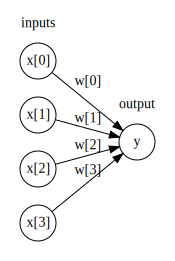

In [103]:
display(plot_logistic_regression_graph())

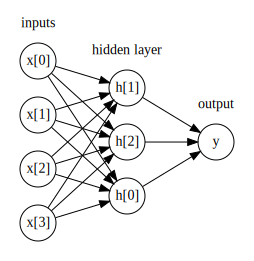

In [104]:
display(plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

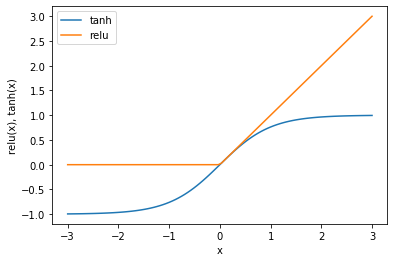

In [105]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

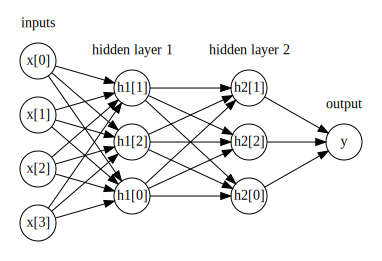

In [106]:
plot_two_hidden_layer_graph()

Text(0, 0.5, 'Feature 1')

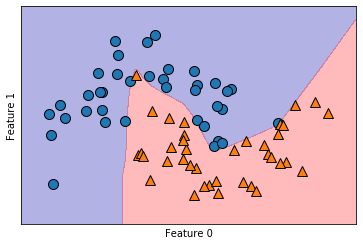

In [107]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

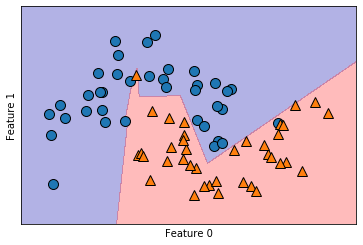

In [108]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

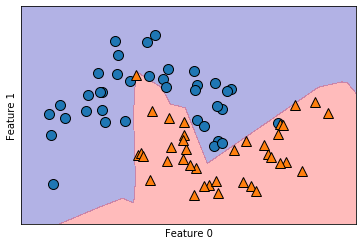

In [109]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

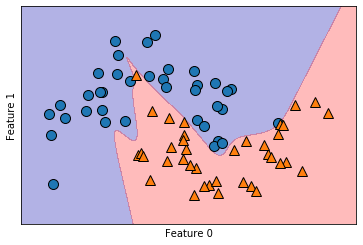

In [110]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity.
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

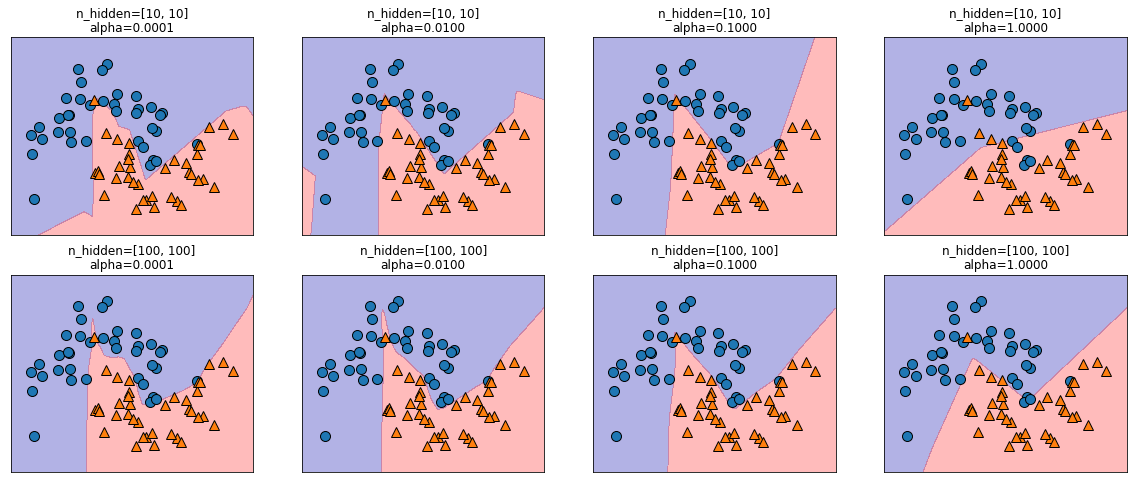

In [111]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

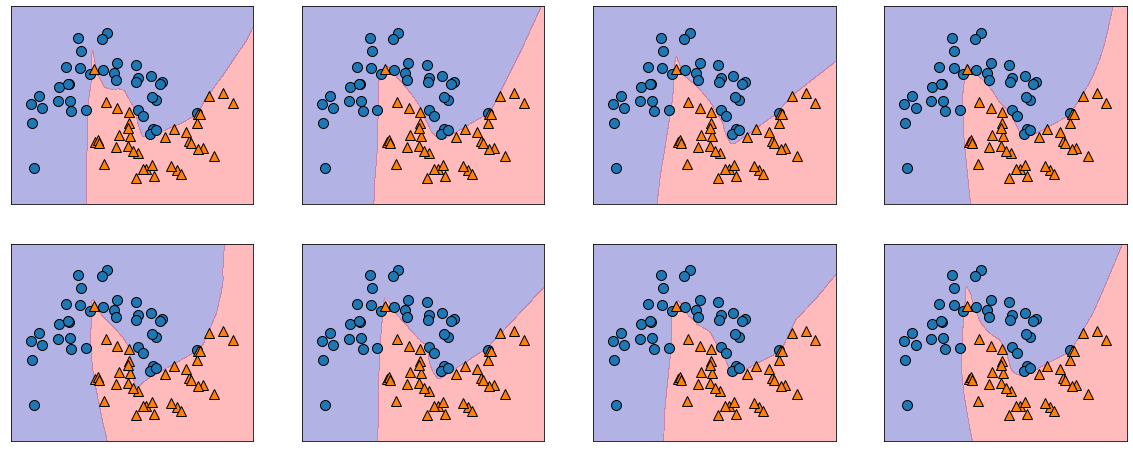

In [112]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [113]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [114]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.88


In [115]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [116]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.972


In [117]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


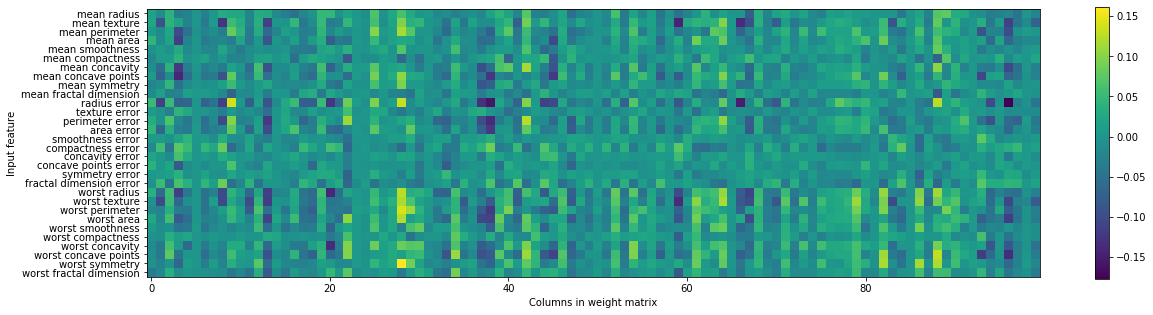

In [118]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

In [119]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# we rename the classes "blue" and "red" for illustration purposes:
y_named = np.array(["blue", "red"])[y]

# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [120]:
print("X_test.shape:", X_test.shape)
print("Decision function shape:",
      gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
Decision function shape: (25,)


In [121]:
# show the first few entries of decision_function
print("Decision function:", gbrt.decision_function(X_test)[:6])

Decision function: [ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [122]:
print("Thresholded decision function:\n",
      gbrt.decision_function(X_test) > 0)
print("Predictions:\n", gbrt.predict(X_test))

Thresholded decision function:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [123]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print("pred is equal to predictions:",
      np.all(pred == gbrt.predict(X_test)))

pred is equal to predictions: True


In [124]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))


Decision function minimum: -7.69 maximum: 4.29


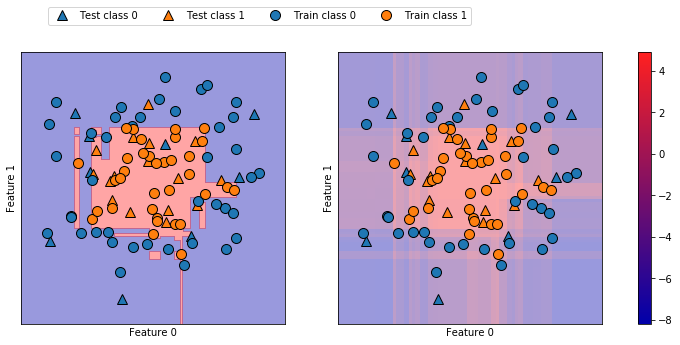

In [125]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=cm2)
scores_image = plot_2d_scores(gbrt, X, ax=axes[1],
                                alpha=.4, cm=ReBl)

for ax in axes:
    # plot training and test points
    discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

In [126]:
print("Shape of probabilities:", gbrt.predict_proba(X_test).shape)

Shape of probabilities: (25, 2)


In [127]:
# show the first few entries of predict_proba
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test[:6]))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


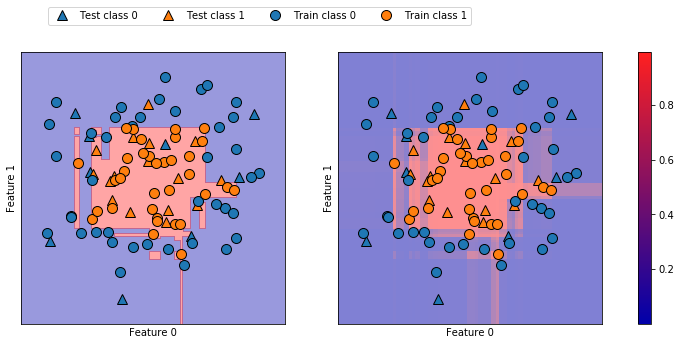

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=cm2)
scores_image = plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
# don't want a transparent colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

In [129]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [130]:
print("Decision function shape:", gbrt.decision_function(X_test).shape)
# plot the first few entries of the decision function
print("Decision function:")
print(gbrt.decision_function(X_test)[:6, :])

Decision function shape: (38, 3)
Decision function:
[[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]]


In [131]:
print("Argmax of decision function:")
print(np.argmax(gbrt.decision_function(X_test), axis=1))
print("Predictions:")
print(gbrt.predict(X_test))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [132]:
#show the first few entries of predict_proba
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test)[:6])
# show that sums across rows are one
print("Sums:", gbrt.predict_proba(X_test)[:6].sum(axis=1))

Predicted probabilities:
[[0.10664722 0.7840248  0.10932798]
 [0.78880668 0.10599243 0.10520089]
 [0.10231173 0.10822274 0.78946553]
 [0.10664722 0.7840248  0.10932798]
 [0.10825347 0.66344934 0.22829719]
 [0.78880668 0.10599243 0.10520089]]
Sums: [1. 1. 1. 1. 1. 1.]


In [133]:
print("Argmax of predicted probabilities:")
print(np.argmax(gbrt.predict_proba(X_test), axis=1))
print("Predictions:")
print(gbrt.predict(X_test))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [134]:
logreg = LogisticRegression()

# represent each target by its class name in the iris dataset
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("unique classes in training data:", logreg.classes_)
print("predictions:", logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax of decision function:", argmax_dec_func[:10])
print("argmax combined with classes_:",
      logreg.classes_[argmax_dec_func][:10])

unique classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
